In [ ]:
"""
Cohort Class CC09 Team 9
Members: Yee Li Ren, Harel (1005133), 
        Sim Shang Hong (1005500), 
        Nandini Prabakaran (1005390), 
        Soh Zheng Rong (1005199)
"""

In [1]:
def user_input(player, board):
    invalid_input = True
  
    if player == "F": # check validity for fox player's choice 
        F_row = 0
        F_col = 0
        for i, row in enumerate(board): # find the current position of the fox
            for j, col in enumerate(row):
                if col == "F":
                    F_row = i
                    F_col = j

        while invalid_input:
            input_row = int(input("Fox, choose which row you would like to move to: "))
            input_col = int(input("Fox, choose which column you would like to move to: "))
            if input_row >= 0 and input_row <= len(board)-1: # checks if the input is within the boundary of the rows
                if input_col >= 0 and input_col <= len(board[0])-1:# checks if the input is within the boundary of the columns
                    if (input_row-1 == F_row or input_row+1 == F_row) and (input_col-1 == F_col or input_col+1 == F_col):# checks if the user's input is diagonally valid
                        if bool(board[input_row][input_col]) == False or board[input_row][input_col] in [1,2,3,4]: #technically uncessary because there can only be 0,1,2,3,4 only 
                            return input_row, input_col, 0 
                        else:
                            print("Unknown error, please try another entry")
                    else:
                        print("You may only move one space diagonally forward or backwards")
                else:
                    print("Please select a valid column (0-6)")
            else:
                print("Please select a valid row (0-7)")

#-------------------------------

    if player == "H": # checking validity for hound player's choice

        F_row = [-2,-2,-2,-2]
        F_col = [-2,-2,-2,-2]
        H_live = [1,2,3,4]
        for a in range(1,5):
            for i, row in enumerate(board): # find the current position of all hounds
                for j, col in enumerate(row):
                    if col == a:
                        #print(a,i,j)
                        F_row[a-1] = i
                        F_col[a-1] = j
                        
        for i,j in enumerate(F_row):
            if j == -2:
                H_live[i] = None
        #print(H_live)

        while invalid_input:
            hound_minion = int(input("Hound, choose which minion you would like to move: "))-1
            input_col = int(input("Hound, choose which column you would like to move to: "))

            if (hound_minion+1) in H_live:
                if input_col >= 0 and input_col <= len(board[0])-1: # checks if the input is within the boundary of the columns
                    if F_row[hound_minion] < len(board)-1: # checks if the minion is not already at the edge of the board
                        if input_col-1 == F_col[hound_minion] or input_col+1 == F_col[hound_minion]:
                            if board[F_row[hound_minion]+1][input_col] == 0 or board[F_row[hound_minion]+1][input_col] == "F":
                                new_row = F_row[hound_minion]+1
                                return new_row, input_col, hound_minion+1
                            else:
                                print("You cannot eat another hound!")
                        else:
                            print("You may only move one space diagonally forward")
                    else:
                        print("This hound has no more valid moves")
                else:
                    print("Please select a valid column (0-6)")
            else:
                print("Please an alive hound")

In [2]:
# this function takes in the state of the board at the start of each round. it then returns a value 0, 1 or 2 depending on who has won
def win_logic(board): 

  # 0 = no winner, 1 = Hounds, 2 = Fox

    winner = 0 

  # check for Fox winning condition ("F" is at the first row)

    for i, row in enumerate(board):
        if "F" in row and i == 0:
            winner = 2
            return winner

  # check for Hound winning condition #1 (no "F" on board)

    F_NP = True
    for row in board:
        for col in row:
            if col == "F":
                F_NP = False
    if F_NP == True:
        return winner+1

  # check for Hound wining condition #2 (Fox has no valid moves remaining)
  
    F_row = 0
    F_col = 0

 # find the current position of the fox
    for i, row in enumerate(board): 
        for j, col in enumerate(row):
            if col == "F":
                F_row = i
                F_col = j

  # variables to detect if the fox is along any boundary
    F_L_col = False 
    F_R_col = False
    F_B_row = False
  
  # checks if the fox is along the boundary
    for i, row in enumerate(board): 
        for j, col in enumerate(row):
            if j == 0 and col == "F" :
                F_L_col = True
            if j == len(row)-1 and col == "F":
                F_R_col = True
            if i == len(board)-1 and col == "F":
                F_B_row = True

    valid_moves_remaining = False

    #if the fox is not along the boundary
    if not F_L_col and not F_R_col and not F_B_row: 
        if not bool(board[F_row-1][F_col-1]) or not bool(board[F_row-1][F_col+1]) or not bool(board[F_row+1][F_col-1]) or not bool(board[F_row+1][F_col+1]):
            # check if any spaces are empty
            valid_moves_remaining = True

  # special case where fox is at left strip
    elif F_L_col: 
        if not bool(board[F_row-1][F_col+1]) or not bool(board[F_row+1][F_col+1]):
            # check if any spaces are empty
            valid_moves_remaining = True 

 # special case where fox is at right strip
    elif F_R_col: 
        if not bool(board[F_row-1][F_col-1]) or not bool(board[F_row+1][F_col-1]):
            # check if any spaces are empty
            valid_moves_remaining = True 
      
  # special case where fox is at bottom strip
    elif F_B_row: 
        if not bool(board[F_row-1][F_col-1]) or not bool(board[F_row-1][F_col+1]):
            # check if any spaces are empty
            valid_moves_remaining = True

    if not valid_moves_remaining:
        winner = 1
  
    return winner

In [3]:
def update_board(player,i,j,board, hound_minion):
    #If fox makes a move
    copyboard = deepcopy(board)
    if player == "F":
        #Search for Fox's current position
        for a,lst in enumerate(board):
            for b,element in enumerate(lst):
                if element == "F":
                    copyboard[a][b] = 0
                    copyboard[i][j] = "F"
                    break
        
        
    #If Hound makes a move
    if player == "H":
        #Choose hound
        hound_number = hound_minion
        #Search for Hound1's current position
        if hound_number == 1:
            for a,lst in enumerate(board):
                for b,element in enumerate(lst):
                    if element == hound_number:
                        copyboard[a][b] = 0
                        copyboard[i][j] = 1
                        break
        elif hound_number == 2:
            for a,lst in enumerate(board):
                for b,element in enumerate(lst):
                    if element == hound_number:
                        copyboard[a][b] = 0
                        copyboard[i][j] = 2
                        break
            
        elif hound_number == 3:
            for a,lst in enumerate(board):
                for b,element in enumerate(lst):
                    if element == hound_number:
                        copyboard[a][b] = 0
                        copyboard[i][j] = 3
                        break
            
        elif hound_number == 4:
            for a,lst in enumerate(board):
                for b,element in enumerate(lst):
                    if element == hound_number:
                        copyboard[a][b] = 0
                        copyboard[i][j] = 4
                        break
            
        
    return copyboard

In [4]:
def switch_player(player):
    if player == "F":
        return "H"
    else:
        return "F"


In [5]:
def display_board(board): # this function receives the state of the board and returns a graphical picture showing the position of the pieces
    board_para = [[1,0,1,0,1,0,1], 
                    [0,1,0,1,0,1,0],
                    [1,0,1,0,1,0,1],
                    [0,1,0,1,0,1,0],
                    [1,0,1,0,1,0,1],
                    [0,1,0,1,0,1,0],
                    [1,0,1,0,1,0,1],
                    [0,1,0,1,0,1,0]]
    for i, row in enumerate(board):
        for j, col in enumerate(row):
            if bool(col):
                board_para[i][j] = board[i][j] # saves the positions of the pieces in the list "board_para"
    for i,row in enumerate(board): # mutate the values in board_para to the values which give each piece its unique colour
        for j,col in enumerate(row):
            if col == 1:
                board_para[i][j] = 0.1
            if col == 2:
                board_para[i][j] = 0.7
            if col == 3:
                board_para[i][j] = 0.9
            if col == 4:
                board_para[i][j] = 0.2
            if col == "F":
                board_para[i][j] = 0.4
    chess = np.array(board_para)
    plt.figure(figsize=(5,5))
    plt.imshow(chess, cmap='Paired_r')
    #plt.figtext(0.2,0.83,"H", size = 30, c="red") # we might want to add text on the box to label the hounds
    return board  # displays the board as an image
#display_board(board)

Yellow = Hound 1, Green = Hound 2, Blue = Hound 3, Purple = Hound 4, Orange = Fox


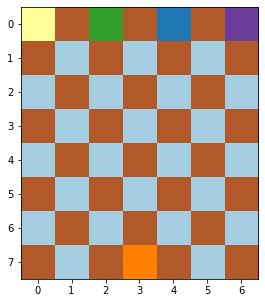

In [ ]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

play = "reset"
while play == "reset":
    board = [[1,0,2,0,3,0,4],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,"F",0,0,0]]
    player = "F"
    x = 0
    
    while x == 0:
        print("Yellow = Hound 1, Green = Hound 2, Blue = Hound 3, Purple = Hound 4, Orange = Fox")
        display_board(board)
        plt.show()
        i,j,hound_minion = user_input(player, board)
        board = update_board(player,i,j,board, hound_minion)
        player = switch_player(player)
        x = win_logic(board)
        

    display_board(board)
    plt.show()

    if x == 1: print("Hounds win")
    else: print("Fox wins")
    play = None
    play = input("Enter reset to reset the board")

